In [1]:
import glob,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

DATADIR = "C:\\Users\\Aaron\\Documents\\data\\planes\\"

CATEGORIES = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

img_array = []

for category in CATEGORIES:  # do all categories
    path = os.path.join(DATADIR,category)  # create path to each category
    for img in os.listdir(path):  # iterate over each image per each category
        img_array.append(cv2.imread(os.path.join(path,img)))  # convert to array

In [2]:
path = 'C:\\Users\\Aaron\\Documents\\data\\planes\\'
files = [f for f in glob.glob(path + "*/*.jpeg", recursive=True)]

In [3]:
training_data = []
IMG_SIZE = 80
def create_training_data():
    for category in CATEGORIES:  # do all 6 categories

        path = os.path.join(DATADIR,category)  # create path to all 6 classes
        class_num = CATEGORIES.index(category)  # get the classification number for each class

        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                data_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([data_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
# Our dataset now has 8509 total samples

100%|██████████████████████████████████████████████████████████████████████████████| 1186/1186 [00:13<00:00, 85.75it/s]

8509


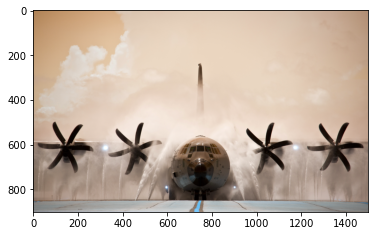

In [4]:
plt.imshow(img_array[1869], cmap='gray')  # graph it
plt.show()  # display!

In [5]:
import random
# shuffle our training data
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])
# Just a quick peek on our shuffled data
# The reason we do this is so that our algorithm can properly learn the images, if they were sequential the 
# the model would get easily confused and have incorrect weights and might not reach optimality

1
4
1
1
1
2
5
0
3
5


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0][:].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [8]:
# Normalize the data
X = X/255.0

# Split the data into train, valid, and test sets into 70-20-10 split , X_valid, X_test 
X_train, y_train = X[0:5956], y[0:5956]
X_valid, y_valid = X[5956:7658], y[5956:7658]
X_test, y_test = X[7658:8510], y[7658:8510]

### Model 1

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# Layer 1
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 3
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 4
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 5
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
# Layer 6
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# Layer 7
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
# Layer 8
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.4))
# Layer 9
model.add(Dense(6))
model.add(Activation('relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 78, 78, 128)       1280      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 39, 39, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 128)        

In [49]:
model1 = model.fit(X_train, y_train, batch_size=128, epochs=25,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/25
5956/5956 [==============================] - 50s 8ms/sample - loss: 5.3858 - accuracy: 0.2712 - val_loss: 3.2104 - val_accuracy: 0.2162
Epoch 2/25
5956/5956 [==============================] - 47s 8ms/sample - loss: 2.3555 - accuracy: 0.3551 - val_loss: 2.0862 - val_accuracy: 0.2391
Epoch 3/25
5956/5956 [==============================] - 48s 8ms/sample - loss: 1.7575 - accuracy: 0.3754 - val_loss: 1.8706 - val_accuracy: 0.2092
Epoch 4/25
5956/5956 [==============================] - 48s 8ms/sample - loss: 1.5802 - accuracy: 0.4197 - val_loss: 1.8242 - val_accuracy: 0.2274
Epoch 5/25
5956/5956 [==============================] - 47s 8ms/sample - loss: 1.4970 - accuracy: 0.4456 - val_loss: 1.7882 - val_accuracy: 0.2632
Epoch 6/25
5956/5956 [==============================] - 47s 8ms/sample - loss: 1.4190 - accuracy: 0.4862 - val_loss: 1.7301 - val_accuracy: 0.3267
Epoch 7/25
5956/5956 [==============================] - 48s 8ms/sample

### Model 2

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model2 = Sequential()

model2.add( Conv2D(128, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(6))
model2.add(Activation('softmax'))

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 78, 78, 128)       1280      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [23]:
model2 = model2.fit(X_train, y_train, batch_size=128, epochs=25,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/20
5956/5956 [==============================] - 166s 28ms/sample - loss: 1.4728 - accuracy: 0.5658 - val_loss: 1.6053 - val_accuracy: 0.4295
Epoch 2/20
5956/5956 [==============================] - 164s 28ms/sample - loss: 1.4626 - accuracy: 0.5762 - val_loss: 1.6266 - val_accuracy: 0.4066
Epoch 3/20
5956/5956 [==============================] - 164s 28ms/sample - loss: 1.4617 - accuracy: 0.5754 - val_loss: 1.6152 - val_accuracy: 0.4148
Epoch 4/20
5956/5956 [==============================] - 165s 28ms/sample - loss: 1.4423 - accuracy: 0.5992 - val_loss: 1.6368 - val_accuracy: 0.3978
Epoch 5/20
5956/5956 [==============================] - 168s 28ms/sample - loss: 1.4433 - accuracy: 0.5959 - val_loss: 1.6161 - val_accuracy: 0.4166
Epoch 6/20
5956/5956 [==============================] - 166s 28ms/sample - loss: 1.4359 - accuracy: 0.6041 - val_loss: 1.6126 - val_accuracy: 0.4219
Epoch 7/20
5956/5956 [==============================] - 16

### Model 3

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model3 = Sequential()

model3.add( Conv2D(128, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add( Conv2D(128, (3,3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(Dropout(0.5))

model3.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model3.add(Dropout(0.5))

model3.add(Dense(6))
model3.add(Activation('softmax'))

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 78, 78, 128)       1280      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [24]:
model3 = model3.fit(X_train, y_train, batch_size=256, epochs=25,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/25
5956/5956 [==============================] - 170s 29ms/sample - loss: 1.6765 - accuracy: 0.6063 - val_loss: 1.8625 - val_accuracy: 0.4125
Epoch 2/25
5956/5956 [==============================] - 169s 28ms/sample - loss: 1.6613 - accuracy: 0.6296 - val_loss: 1.8695 - val_accuracy: 0.4201
Epoch 3/25
5956/5956 [==============================] - 166s 28ms/sample - loss: 1.6613 - accuracy: 0.6392 - val_loss: 1.8741 - val_accuracy: 0.4183
Epoch 4/25
5956/5956 [==============================] - 166s 28ms/sample - loss: 1.6475 - accuracy: 0.6561 - val_loss: 1.8759 - val_accuracy: 0.4207
Epoch 5/25
5956/5956 [==============================] - 168s 28ms/sample - loss: 1.6419 - accuracy: 0.6679 - val_loss: 1.8847 - val_accuracy: 0.4142
Epoch 6/25
5956/5956 [==============================] - 167s 28ms/sample - loss: 1.6273 - accuracy: 0.6885 - val_loss: 1.8955 - val_accuracy: 0.4066
Epoch 7/25
5956/5956 [==============================] - 16

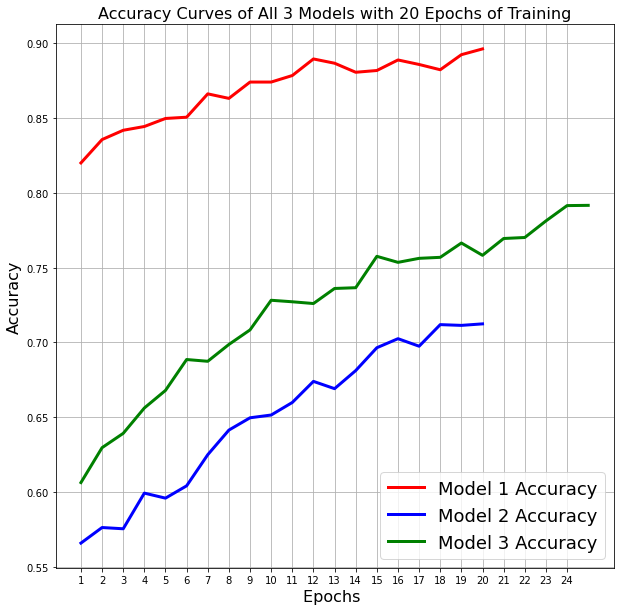

In [40]:
# Plotting all 3 models accuracy scores
plt.figure(figsize=[10,10])
plt.plot(model1.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model2.history['accuracy'],'b',linewidth=3.0)
plt.plot(model3.history['accuracy'],'g',linewidth=3.0)
plt.legend(['Model 1 Accuracy', 'Model 2 Accuracy', 'Model 3 Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

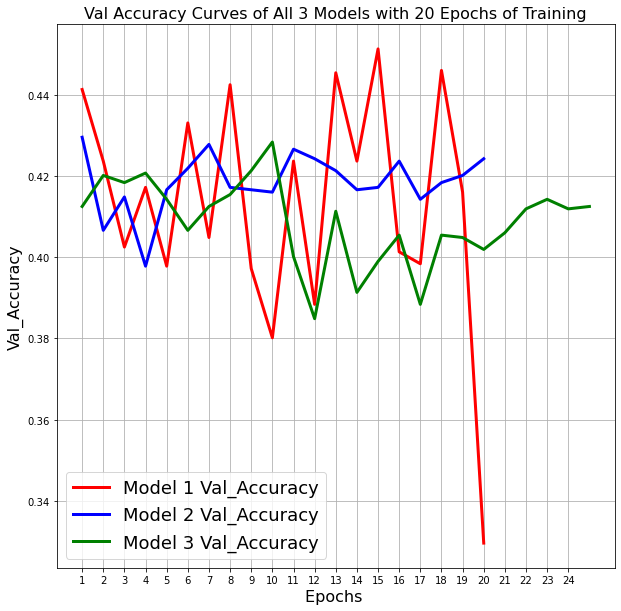

In [39]:
# Plotting all 3 models val accuracy scores
plt.figure(figsize=[10,10])
plt.plot(model1.history['val_accuracy'], 'r', linewidth=3.0)
plt.plot(model2.history['val_accuracy'],'b',linewidth=3.0)
plt.plot(model3.history['val_accuracy'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Accuracy', 'Model 2 Val_Accuracy', 'Model 3 Val_Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Val_Accuracy',fontsize=16)
plt.title('Val Accuracy Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

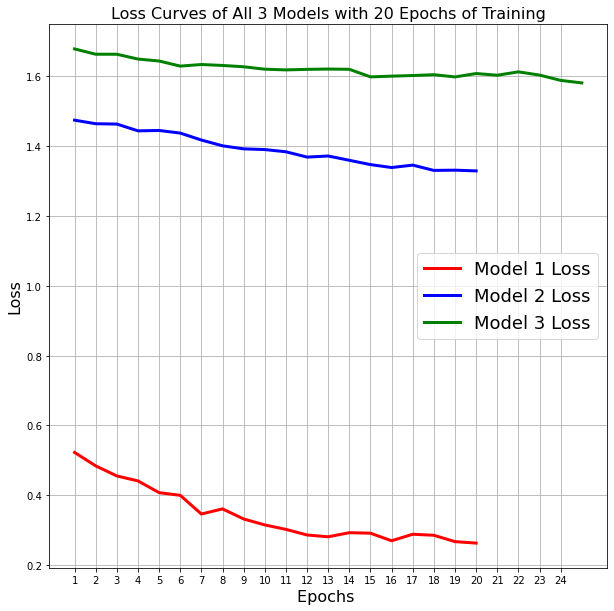

In [38]:
# Plotting all 3 models training losses
plt.figure(figsize=[10,10])
plt.plot(model1.history['loss'], 'r', linewidth=3.0)
plt.plot(model2.history['loss'],'b',linewidth=3.0)
plt.plot(model3.history['loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Loss', 'Model 2 Loss', 'Model 3 Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

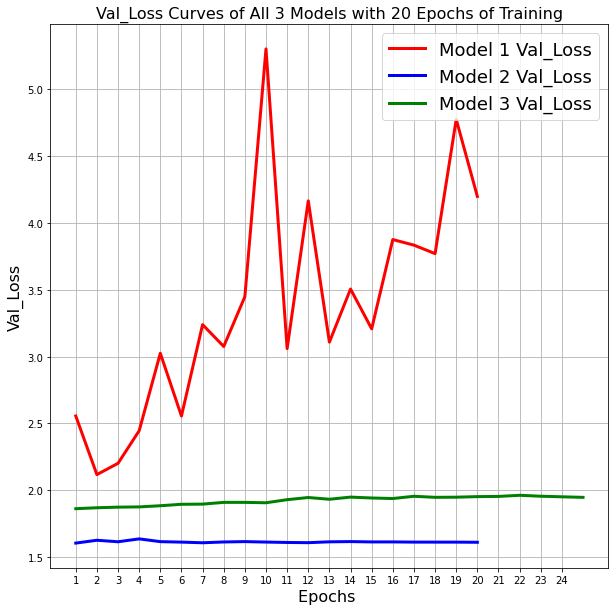

In [37]:
# Plotting Val Loss Curves for all 3 Models
plt.figure(figsize=[10,10])
plt.plot(model1.history['val_loss'], 'r', linewidth=3.0)
plt.plot(model2.history['val_loss'],'b',linewidth=3.0)
plt.plot(model3.history['val_loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Loss', 'Model 2 Val_Loss', 'Model 3 Val_Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Val_Loss',fontsize=16)
plt.title('Val_Loss Curves of All 3 Models with 20 Epochs of Training',fontsize=16)
plt.grid()

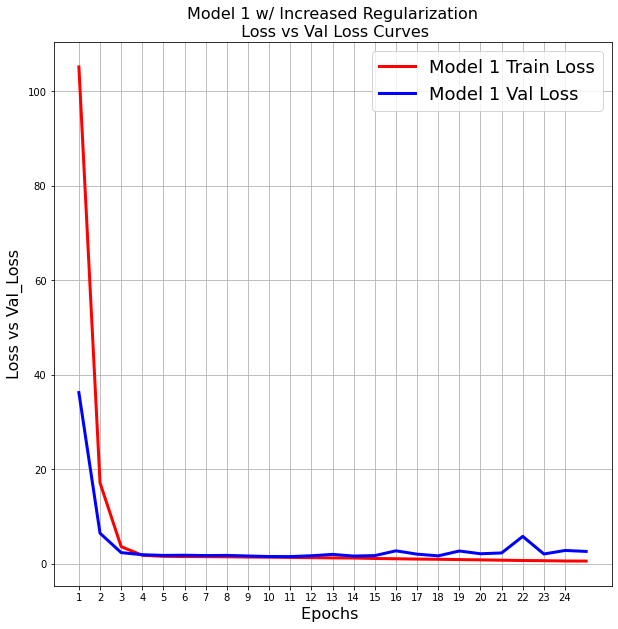

In [66]:
# Plotting Model 1's losses
plt.figure(figsize=[10,10])
plt.plot(model1_new.history['loss'], 'r', linewidth=3.0)
plt.plot(model1_new.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Model 1 Train Loss', 'Model 1 Val Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Loss vs Val_Loss',fontsize=16)
plt.title('Model 1 w/ Increased Regularization\n Loss vs Val Loss Curves',fontsize=16)
plt.grid()

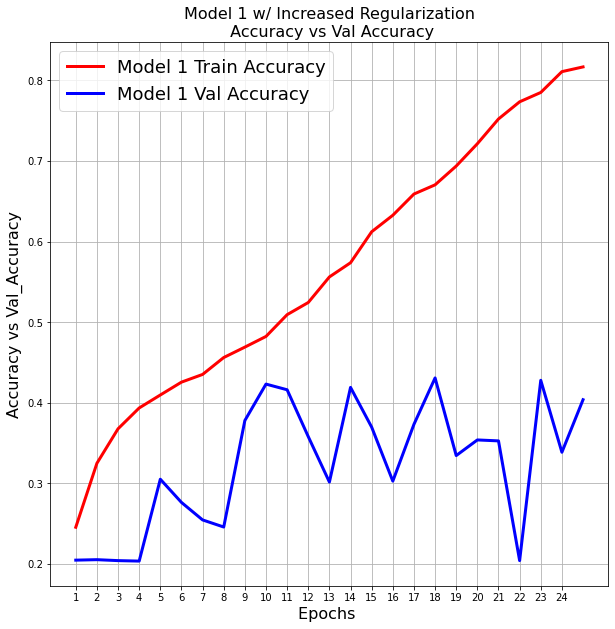

In [67]:
# Plotting Model 1's Accuracies
plt.figure(figsize=[10,10])
plt.plot(model1_new.history['accuracy'], 'r', linewidth=3.0)
plt.plot(model1_new.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Model 1 Train Accuracy', 'Model 1 Val Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Accuracy vs Val_Accuracy',fontsize=16)
plt.title('Model 1 w/ Increased Regularization\n Accuracy vs Val Accuracy',fontsize=16)
plt.grid()

It seems that our first model is suffering from overfitting the data

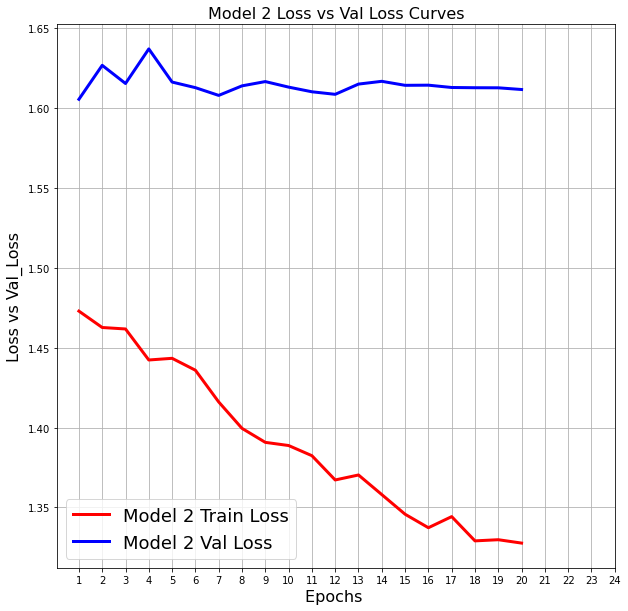

In [47]:
# Plotting Model 2's losses
plt.figure(figsize=[10,10])
plt.plot(model2.history['loss'], 'r', linewidth=3.0)
plt.plot(model2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Model 2 Train Loss', 'Model 2 Val Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,24)],[i for i in range(1,25)])
plt.ylabel('Loss vs Val_Loss',fontsize=16)
plt.title('Model 2 Loss vs Val Loss Curves',fontsize=16)
plt.grid()

### Model 1 with increased Regularization

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# Layer 1
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer 2
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 3
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 4
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Layer 5
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
# Layer 6
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# Layer 7
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.3)))
model.add(layers.BatchNormalization())
# Layer 8
model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.3)))
model.add(layers.Dropout(0.4))
# Layer 9
model.add(Dense(6))
model.add(Activation('relu'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 78, 78, 128)       1280      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 39, 39, 128)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 37, 37, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 128)       

In [65]:
model1_new = model.fit(X_train, y_train, batch_size=128, epochs=25,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/25
5956/5956 [==============================] - 53s 9ms/sample - loss: 105.1575 - accuracy: 0.2453 - val_loss: 36.2649 - val_accuracy: 0.2045
Epoch 2/25
5956/5956 [==============================] - 48s 8ms/sample - loss: 17.1752 - accuracy: 0.3247 - val_loss: 6.5069 - val_accuracy: 0.2051
Epoch 3/25
5956/5956 [==============================] - 48s 8ms/sample - loss: 3.6671 - accuracy: 0.3675 - val_loss: 2.4066 - val_accuracy: 0.2039
Epoch 4/25
5956/5956 [==============================] - 50s 8ms/sample - loss: 1.8403 - accuracy: 0.3934 - val_loss: 1.9610 - val_accuracy: 0.2033
Epoch 5/25
5956/5956 [==============================] - 51s 9ms/sample - loss: 1.6184 - accuracy: 0.4095 - val_loss: 1.8163 - val_accuracy: 0.3049
Epoch 6/25
5956/5956 [==============================] - 50s 8ms/sample - loss: 1.5709 - accuracy: 0.4255 - val_loss: 1.8511 - val_accuracy: 0.2761
Epoch 7/25
5956/5956 [==============================] - 51s 9ms/sa

### Model 2 with Regaluraization

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model2 = Sequential()

model2.add( Conv2D(128, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add( Conv2D(128, (3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.003)))
model2.add(Dropout(0.5))

model2.add(Dense(512, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=keras.regularizers.l2(0.003)))
model2.add(Dropout(0.5))

model2.add(Dense(6))
model2.add(Activation('softmax'))

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 78, 78, 128)       1280      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 36992)            

In [57]:
model2 = model2.fit(X_train, y_train, batch_size=128, epochs=25,
                                   verbose=1, validation_data=(X_valid, y_valid))

Train on 5956 samples, validate on 1702 samples
Epoch 1/25
5956/5956 [==============================] - 174s 29ms/sample - loss: 12.1294 - accuracy: 0.2144 - val_loss: 4.0149 - val_accuracy: 0.2033
Epoch 2/25
5956/5956 [==============================] - 171s 29ms/sample - loss: 2.7193 - accuracy: 0.2220 - val_loss: 2.0398 - val_accuracy: 0.2051
Epoch 3/25
5956/5956 [==============================] - 171s 29ms/sample - loss: 1.8897 - accuracy: 0.2233 - val_loss: 1.8285 - val_accuracy: 0.2074
Epoch 4/25
5956/5956 [==============================] - 171s 29ms/sample - loss: 1.8597 - accuracy: 0.2337 - val_loss: 1.8802 - val_accuracy: 0.2497
Epoch 5/25
5956/5956 [==============================] - 170s 29ms/sample - loss: 1.8546 - accuracy: 0.2389 - val_loss: 1.8543 - val_accuracy: 0.2391
Epoch 6/25
5956/5956 [==============================] - 170s 29ms/sample - loss: 1.8363 - accuracy: 0.2487 - val_loss: 1.8221 - val_accuracy: 0.2474
Epoch 7/25
5956/5956 [==============================] - 1

KeyboardInterrupt: 